# Chapter 1 生命保険数理

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from copy import copy

### 生命表

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


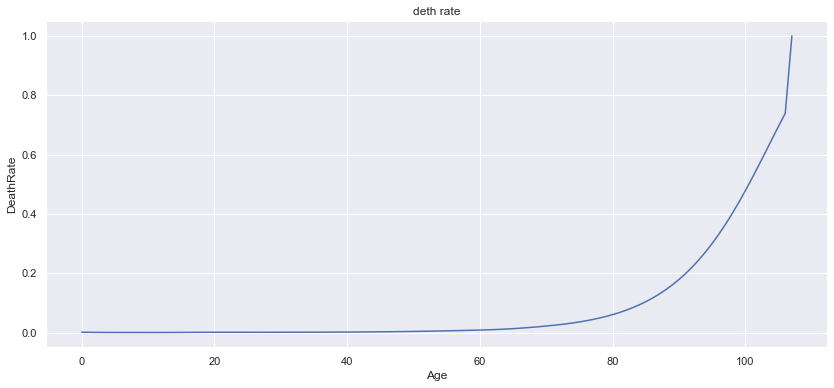

,Age,DeathRate,SurvivalRate,NumberOfSurviving,NumberOfDeathes,LifeExpectancy
0,0,0.00108,0.99892,100000,0,100.0
1,1,0.00075,0.99925,100000,0,100.0
2,2,0.00049,0.99951,100000,0,100.0
3,3,0.00031,0.99969,100000,0,100.0
4,4,0.00021,0.99979,100000,0,100.0
5,5,0.00017,0.99983,100000,0,100.0
6,6,0.00016,0.99984,100000,0,100.0
7,7,0.00016,0.99984,100000,0,100.0
8,8,0.00016,0.99984,100000,0,100.0
9,9,0.00015,0.99985,100000,0,100.0


In [4]:
df=pd.read_table("shibouritu07M.txt",encoding="shift-jis")
df.columns=["Age","DeathRate"]
plt.figure(figsize=(14,6))
sns.lineplot(x="Age",y="DeathRate",data=df)
plt.title("deth rate");plt.show()
df["SurvivalRate"]=1-df["DeathRate"]
df["NumberOfSurviving"]=100000
df["NumberOfDeathes"]=0
df["LifeExpectancy"]=100.0
df

In [5]:
df.loc[0,"NumberOfDeathes"]=df.loc[0,"NumberOfSurviving"]*df.loc[0,"DeathRate"]
df.loc[0,"LifeExpectancy"]=0.5+df.loc[1:df.shape[0]-1,"NumberOfSurviving"].sum()/df.loc[0,"NumberOfSurviving"]       

for row_index in range(1,df.shape[0]):
    df.loc[row_index,"NumberOfSurviving"]=df.loc[row_index-1,"NumberOfSurviving"]*df.loc[row_index-1,"SurvivalRate"]
    df.loc[row_index,"NumberOfDeathes"]=df.loc[row_index,"NumberOfSurviving"]*df.loc[row_index,"DeathRate"]
    if row_index==df.shape[0]-1:
        df.loc[row_index,"NumberOfDeathes"]=0
        df.loc[row_index,"LifeExpectancy"]=0.5
        break
    df.loc[row_index,"LifeExpectancy"]=0.5+df.loc[row_index+1:df.shape[0]-1,"NumberOfSurviving"].sum()/df.loc[row_index,"NumberOfSurviving"] 

df["NumberOfSurviving"]=(df["NumberOfSurviving"]+0.5).astype(int)
df["NumberOfDeathes"]=(df["NumberOfDeathes"]+0.5).astype(int)
print("生命表")
df

生命表


,Age,DeathRate,SurvivalRate,NumberOfSurviving,NumberOfDeathes,LifeExpectancy
0,0,0.00108,0.99892,100000,108,107.500000
1,1,0.00075,0.99925,99892,75,106.614604
2,2,0.00049,0.99951,99817,49,105.692417
3,3,0.00031,0.99969,99768,31,104.741663
4,4,0.00021,0.99979,99737,21,103.771353
5,5,0.00017,0.99983,99716,17,102.790200
6,6,0.00016,0.99984,99699,16,101.804576
7,7,0.00016,0.99984,99683,16,100.817612
8,8,0.00016,0.99984,99667,16,99.830328
9,9,0.00015,0.99985,99651,15,98.842726


### 確定年金の現価・終価

In [6]:
akishi=lambda i,n: (1-(1/(1+i))**n)/(1-(1/(1+i)))
akimatsu=lambda i,n: (1/(1+i))*(1-(1/(1+i))**n)/(1-(1/(1+i)))
print(akishi(0.05,10))
print(akimatsu(0.05,10))

8.107821675644052
7.721734929184811


### 債務の返済

In [7]:
print("元金均等償却")
N=10
i=0.03
year=list(range(1,11))
P=1000
c=[0]*N
SS=copy(c)
SS.insert(0,P)

for j in range(0,N):
    SS[j+1]=SS[j]*(1+i)-P/N
    c[j]=P/N+i*SS[j+1]
S=SS[1:N+1]
PP=[P/N]*N
pd.DataFrame({"Year":year,"Repayment":c,"AmortizationOfPrincipal":PP,"InterestDepreciation":np.array(c)-np.array(PP),"DebtBalance":S})      

元金均等償却


,Year,Repayment,AmortizationOfPrincipal,InterestDepreciation,DebtBalance
0,1,127.900000,100.0,27.900000,930.000000
1,2,125.737000,100.0,25.737000,857.900000
2,3,123.509110,100.0,23.509110,783.637000
3,4,121.214383,100.0,21.214383,707.146110
4,5,118.850815,100.0,18.850815,628.360493
5,6,116.416339,100.0,16.416339,547.211308
6,7,113.908829,100.0,13.908829,463.627647
7,8,111.326094,100.0,11.326094,377.536477
8,9,108.665877,100.0,8.665877,288.862571
9,10,105.925853,100.0,5.925853,197.528448


In [8]:
print("元利均等償却")
N=10
i=0.03
v=1/(1+i)
a=P/v/(1-v**N)*(1-v)
year=list(range(1,11))
P=1000
c=[a]*N
SS=copy(c)
SS.insert(0,P)
for j in range(0,N):
    SS[j+1]=SS[j]*(1+i)-a
    PP[j]=SS[j]-SS[j+1]
S=SS[1:N+1]
pd.DataFrame({"Year":year,"Repayment":c,"AmortizationOfPrincipal":PP,"InterestDepreciation":np.array(c)-np.array(PP),"DebtBalance":S})      

元利均等償却


,Year,Repayment,AmortizationOfPrincipal,InterestDepreciation,DebtBalance
0,1,117.230507,87.230507,30.000000,9.127695e+02
1,2,117.230507,89.847422,27.383085,8.229221e+02
2,3,117.230507,92.542844,24.687662,7.303792e+02
3,4,117.230507,95.319130,21.911377,6.350601e+02
4,5,117.230507,98.178704,19.051803,5.368814e+02
5,6,117.230507,101.124065,16.106442,4.357573e+02
6,7,117.230507,104.157787,13.072720,3.315995e+02
7,8,117.230507,107.282520,9.947986,2.243170e+02
8,9,117.230507,110.500996,6.729511,1.138160e+02
9,10,117.230507,113.816026,3.414481,2.984279e-13


### 計算基数と純保険料

In [53]:
v=1/(1.015)
df.loc[0,"Dx"]=1
df.loc[1:,"Dx"]=v
temp=df["Dx"].cumprod()*df["NumberOfSurviving"]
df["Dx"]=(temp+0.5).astype(int)

df.loc[0,"Cx"]=1
df.loc[1:,"Cx"]=v
temp=df["Cx"].cumprod()*np.sqrt(v)*df["NumberOfDeathes"]
df["Cx"]=(temp+0.5).astype(int)

df["Nx"]=df.loc[::-1,"Dx"].cumsum()[::-1]
df["Mx"]=df.loc[::-1,"Cx"].cumsum()[::-1]

print("生命表と計算基数表")
df

生命表と計算基数表


,Age,DeathRate,SurvivalRate,NumberOfSurviving,NumberOfDeathes,LifeExpectancy,Dx,Cx,Nx,Mx
0,0,0.00108,0.99892,100000,108,107.500000,100000,107,4613636,32050
1,1,0.00075,0.99925,99892,75,106.614604,98416,73,4513636,31943
2,2,0.00049,0.99951,99817,49,105.692417,96889,47,4415220,31870
3,3,0.00031,0.99969,99768,31,104.741663,95410,29,4318331,31823
4,4,0.00021,0.99979,99737,21,103.771353,93971,20,4222921,31794
5,5,0.00017,0.99983,99716,17,102.790200,92562,16,4128950,31774
6,6,0.00016,0.99984,99699,16,101.804576,91179,15,4036388,31758
7,7,0.00016,0.99984,99683,16,100.817612,89817,14,3945209,31743
8,8,0.00016,0.99984,99667,16,99.830328,88476,14,3855392,31729
9,9,0.00015,0.99985,99651,15,98.842726,87154,13,3766916,31715


In [59]:
culc_term_insurance_net_premium=lambda x,n: (df.loc[x,"Mx"]-df.loc[x+n+1,"Mx"])/(df.loc[x+1,"Nx"]-df.loc[x+n+1,"Nx"])    
culc_life_insurance_net_premium=lambda x,n: (df.loc[x+n+1,"Dx"])/(df.loc[x+1,"Nx"]-df.loc[x+n+1,"Nx"])      

TEIKI=culc_term_insurance_net_premium(30,30)
SEIZON=culc_life_insurance_net_premium(30,30)
print(TEIKI)
print(SEIZON)
print(TEIKI+SEIZON)

0.0029092705180577636
0.02442755963902792
0.027336830157085684


### 責任準備金

In [69]:
def V(x,n,t):
    t=np.array(t)
    Mx=df["Mx"];Nx=df["Nx"];Dx=df["Dx"]
    policy_reserve=(Mx[x+t+1]-Mx[x+n+1]+Dx[x+n+1])/Dx[x+t+1]  \
    - (Mx[x+1]-Mx[x+n+1]+Dx[x+n+1])/(Nx[x+1]-Nx[x+n+1])*(Nx[x+t+1]-Nx[x+n+1])/Dx[x+t+1]    
    return policy_reserve
    

In [73]:
V(30,10,list(range(0,11)))

31    0.000000
32    0.093100
33    0.187676
34    0.283717
35    0.381261
36    0.480338
37    0.580983
38    0.683242
39    0.787128
40    0.892699
41    1.000000
dtype: float64

In [72]:
V(40,10,np.arange(0,11))

41    0.000000
42    0.092961
43    0.187352
44    0.283226
45    0.380601
46    0.479537
47    0.580076
48    0.682335
49    0.786349
50    0.892199
51    1.000000
dtype: float64